In [233]:
#import libraries, only need 3 of them, "Pandas", "Matplotlib" & "Numpy"
import pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np

#set some parameters for "Matplotlib"
mpl.rcParams['figure.figsize'] = [16, 9]


* First, we randomly initialize k points, called means or cluster centroids.
* We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
* We repeat the process for a given number of iterations and at the end, we have our clusters.

## Step 1: Get the dataset and plot it. 

In [234]:
df = pd.read_csv(rFILE_PATH)
X = df.drop(df.columns[:3], axis= 1).to_numpy() 

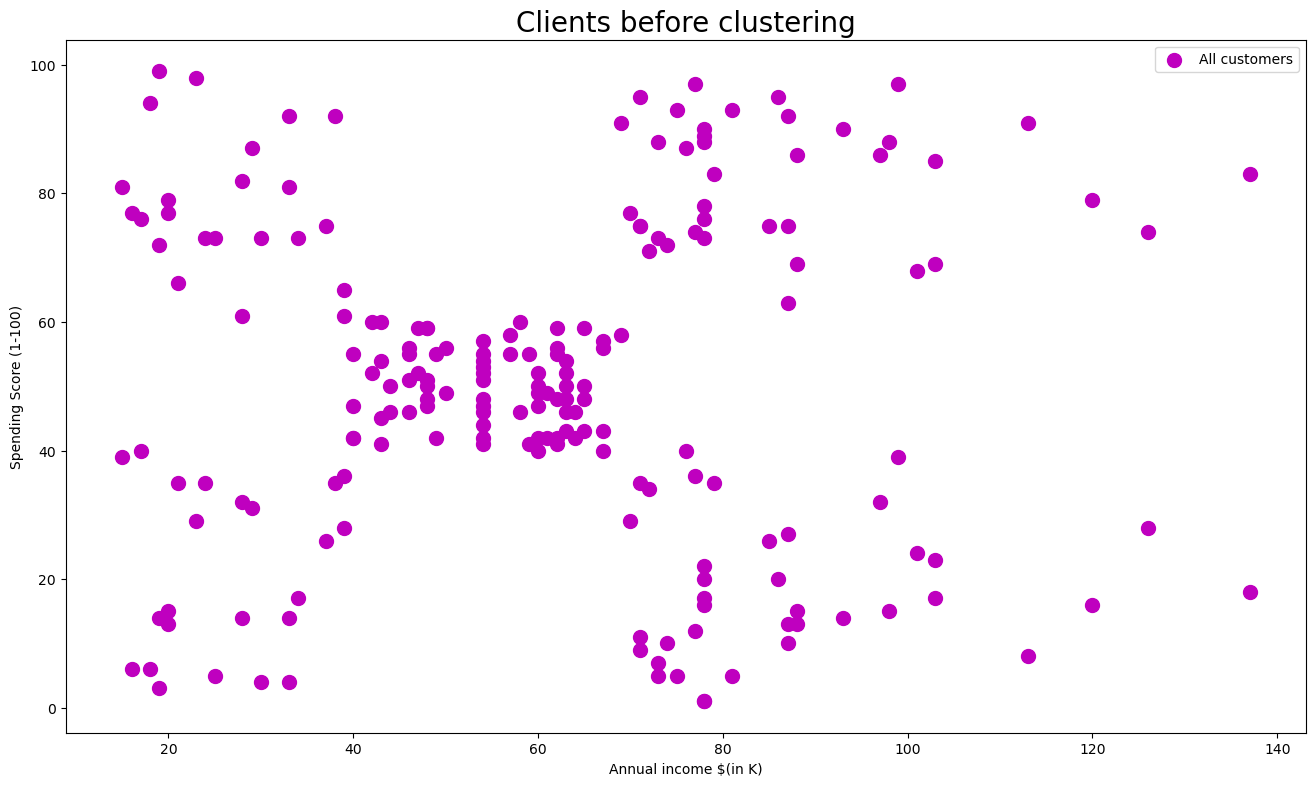

In [237]:
plt.scatter(X[:,0],X[:,1], s= 100, c= 'm', label='All customers')
plt.title('Clients before clustering', fontsize= 20)
plt.xlabel('Annual income $(in K)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Step 2: We randomly initialize centroids.

In [239]:
k = 5

clusters = {}
np.random.seed(32)

for idx in range(k):
    center = list()
    if idx == 0:
        center.append(np.random.randint(5, 35))
        center.append(np.random.randint(5, 35))
    else:
        center.append(np.random.randint(idx * 15, (idx + 1) * 30))
        center.append(np.random.randint(idx * 15, (idx + 1) * 30))
        
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster

In [240]:
clusters

{0: {'center': [28, 16], 'points': []},
 1: {'center': [20, 39], 'points': []},
 2: {'center': [49, 37], 'points': []},
 3: {'center': [48, 54], 'points': []},
 4: {'center': [64, 71], 'points': []}}

## Step 3: Plot the visualize again with randomly set centroids.

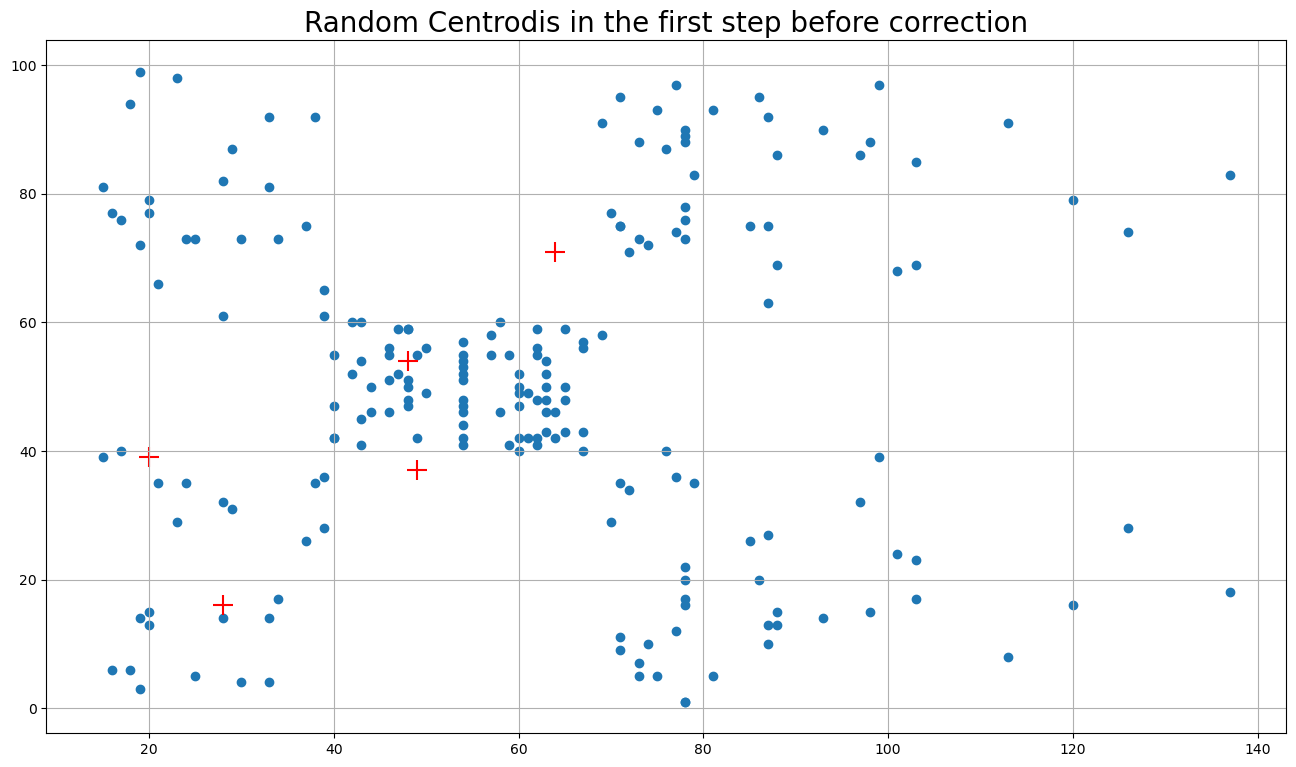

In [242]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '+',s = 200,c = 'red')
    plt.title('Random Centrodis in the first step before correction', fontsize= 20)
plt.show()

## Step 4: Define "Euclidean Distance".

In [229]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

## Step 5: Update "Centroids" for better result.

In [252]:
clusters

{0: {'center': [28, 16], 'points': []},
 1: {'center': [20, 39], 'points': []},
 2: {'center': [49, 37], 'points': []},
 3: {'center': [48, 54], 'points': []},
 4: {'center': [64, 71], 'points': []}}

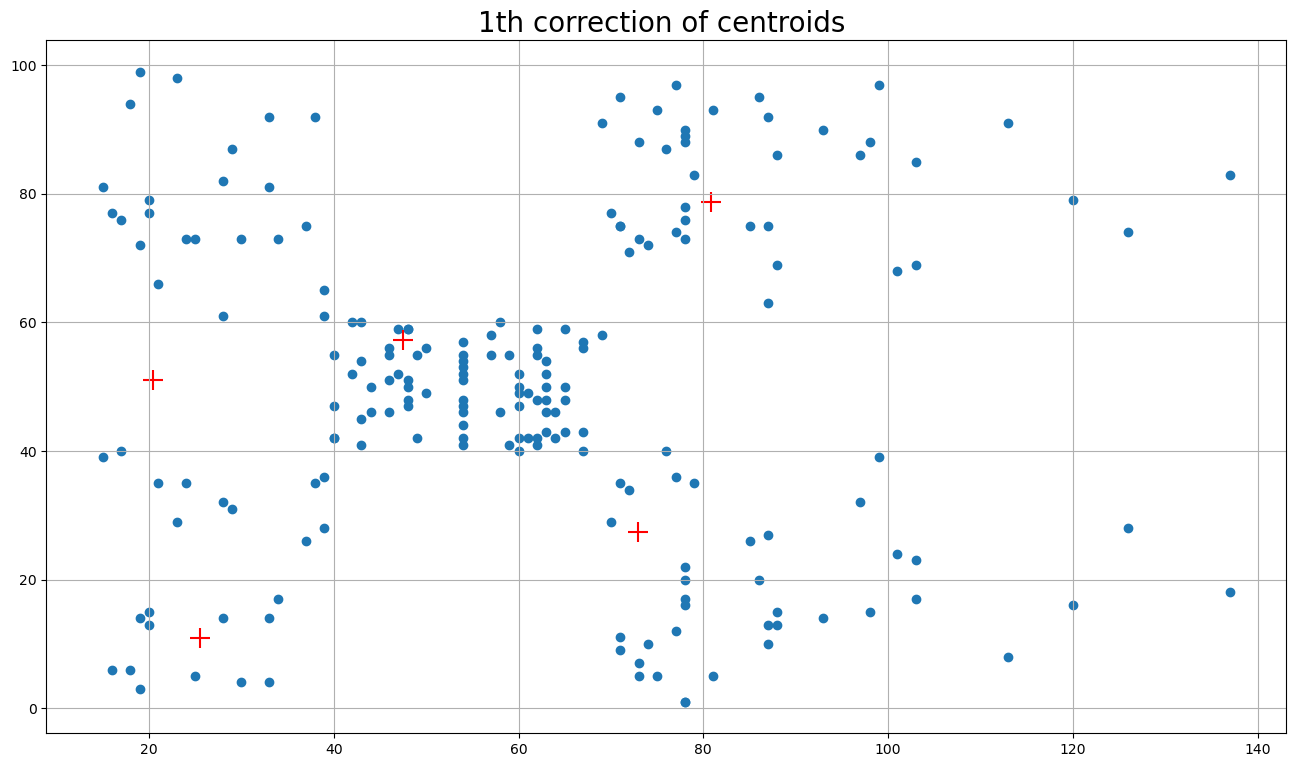

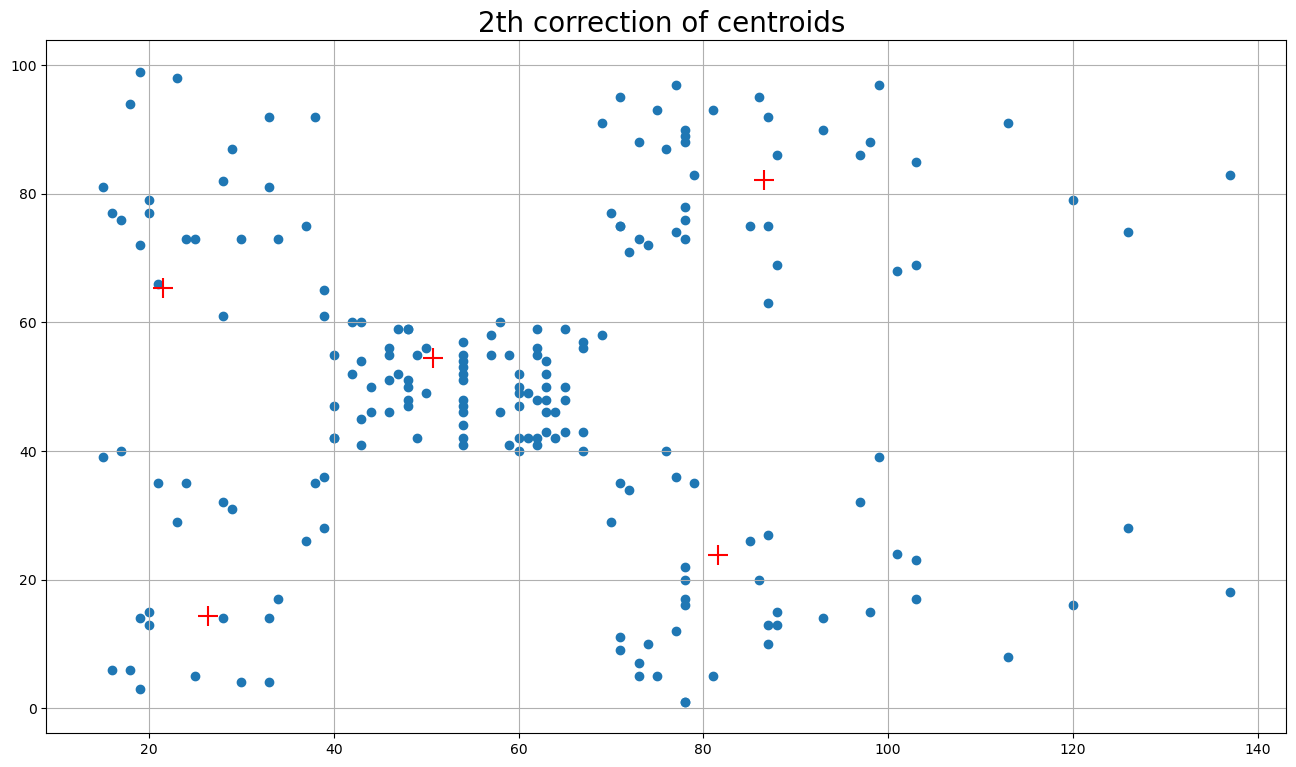

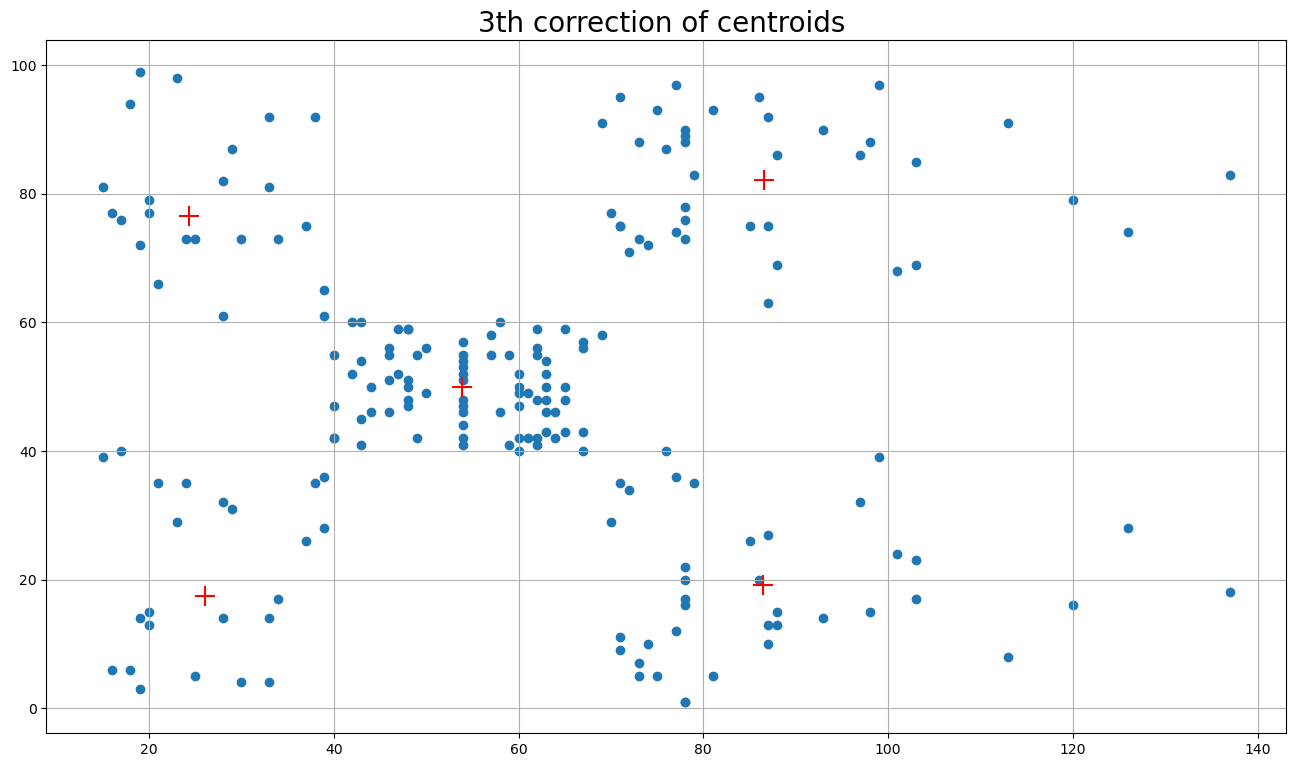

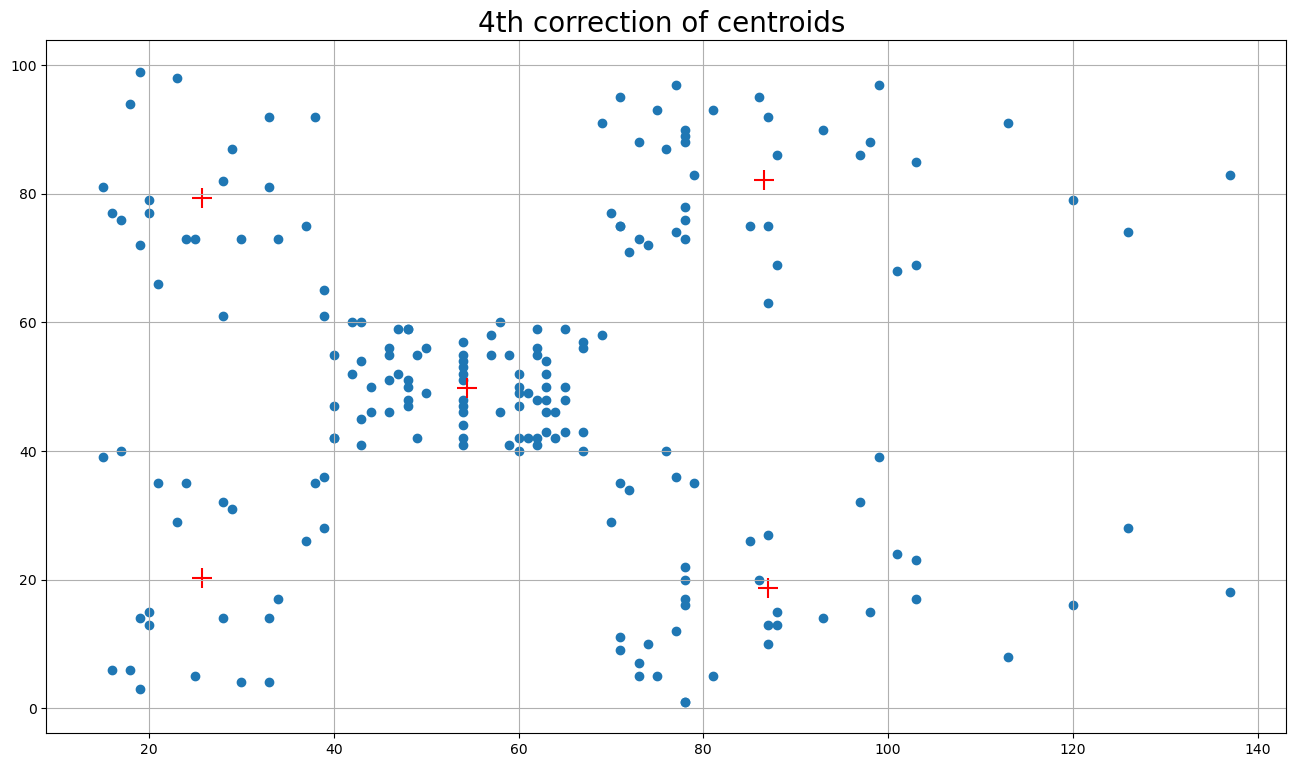

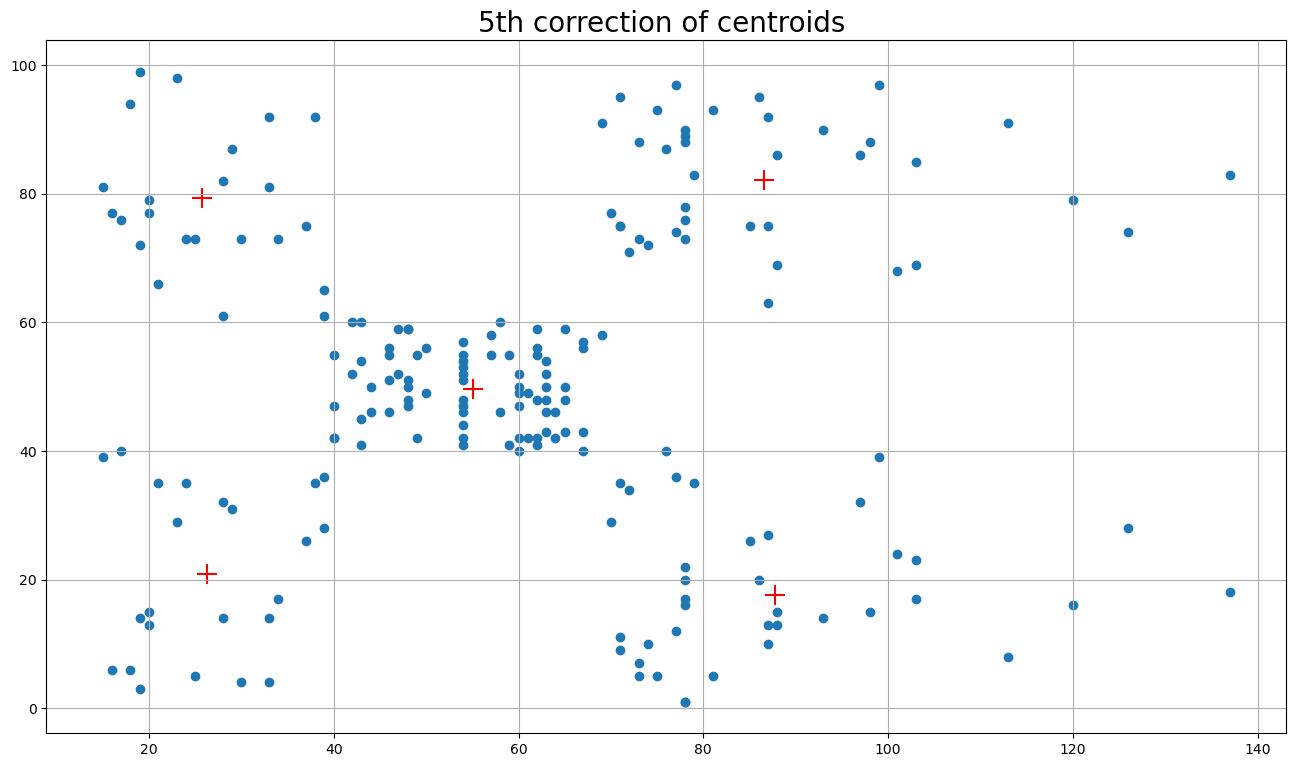

In [268]:
for a in range(5):    
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = euclidean_distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    plt.scatter(X[:,0],X[:,1])
    plt.grid(True)
    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],marker = '+',s = 200,c = 'red')
        plt.title(f"{a+1}th correction of centroids ", fontsize= 20)
    plt.show()

## Step 6: Predict Clusters with new updated "Centrodis".

In [269]:
pred = []
for i in range(X.shape[0]):
    dist = []
    for j in range(k):
        dist.append(euclidean_distance(X[i],clusters[j]['center']))
    pred.append(np.argmin(dist))

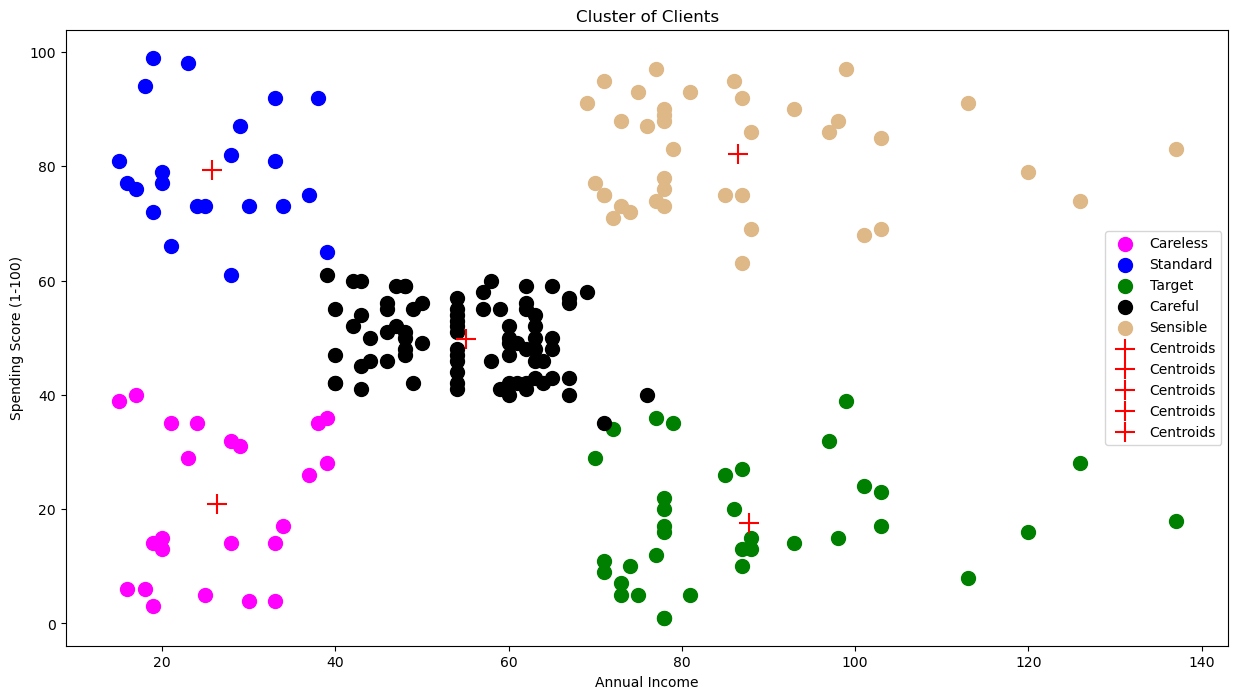

In [270]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[np.array(pred) == 0, 0],X[np.array(pred) == 0, 1],s=100,c='magenta',label='Careless')
plt.scatter(X[np.array(pred) == 1, 0],X[np.array(pred) == 1, 1],s=100,c='blue',label='Standard')
plt.scatter(X[np.array(pred) == 2, 0],X[np.array(pred) == 2, 1],s=100,c='green',label='Target')
plt.scatter(X[np.array(pred) == 3, 0],X[np.array(pred) == 3, 1],s=100,c='black',label='Careful')
plt.scatter(X[np.array(pred) == 4, 0],X[np.array(pred) == 4, 1],s=100,c='burlywood',label='Sensible')

for i in clusters.keys():  
    plt.scatter(clusters[i]['center'][0], 
                clusters[i]['center'][1],
                s= 200,
                c= 'red',
                label= 'Centroids',
                marker = "+")
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()